<a href="https://colab.research.google.com/github/geeuleeo/esercizio_Turismo/blob/main/esercitzaione280524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df_arrivi_agri = pd.read_csv("Arrivi-negli-agriturismi-in-Italia-per-regione.csv", sep=";")
df_arrivi_alb = pd.read_csv("/content/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione.csv", sep=";")
df_arrivi_camp = pd.read_csv("/content/Arrivi-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv", sep=";")

df_presenze_agri = pd.read_csv("/content/Presenze-negli-agriturismi-in-Italia-per-regione.csv", sep=";")
df_presenze_alb = pd.read_csv("/content/Presenze-negli-esercizi-alberghieri-in-Italia-per-regione.csv", sep=";")
df_presenze_camp = pd.read_csv("/content/Presenze-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv", sep=";")
display(df_arrivi_agri)


,Regione,Anno,Arrivi
0,Piemonte,2008,72531
1,Piemonte,2009,77626
2,Piemonte,2010,87681
3,Piemonte,2011,103404
4,Valle d'Aosta,2008,8087
...,...,...,...
75,Sicilia,2011,99863
76,Sardegna,2008,11620
77,Sardegna,2009,13231
78,Sardegna,2010,11318


In [ ]:
display(df_arrivi_alb)
display(df_presenze_alb)

,Regione,Anno,Arrivi
0,Piemonte,2008,2747466
1,Piemonte,2009,2948253
2,Piemonte,2010,3193461
3,Piemonte,2011,3290535
4,Piemonte,2012,3349225
...,...,...,...
95,Sardegna,2008,1805023
96,Sardegna,2009,1821863
97,Sardegna,2010,1797723
98,Sardegna,2011,1755879


,Regione,Anno,Presenze
0,Piemonte,2008,7499879
1,Piemonte,2009,7167700
2,Piemonte,2010,8026222
3,Piemonte,2011,8272766
4,Piemonte,2012,8102503
...,...,...,...
95,Sardegna,2008,8382167
96,Sardegna,2009,8243072
97,Sardegna,2010,8311799
98,Sardegna,2011,8298152


In [ ]:
def ArriviPerRegione__():
  media_arrivi_per_regione = df_arrivi_alb.groupby('Regione')['Arrivi'].mean()
  for regione, media_arrivi in media_arrivi_per_regione.items():
          print(f'Regione:  {regione},       Media Arrivi: {media_arrivi:.2f}')
          print("")

In [ ]:
def PresenzePerRegione__():
  media_presenze_per_regione = df_arrivi_alb.groupby('Regione')['Presenze'].mean()
  for regione, media_arrivi in media_presenze_per_regione.items():
          print(f'Regione:  {regione},      Media Presenze:  {media_arrivi:.2f}')
          print("")

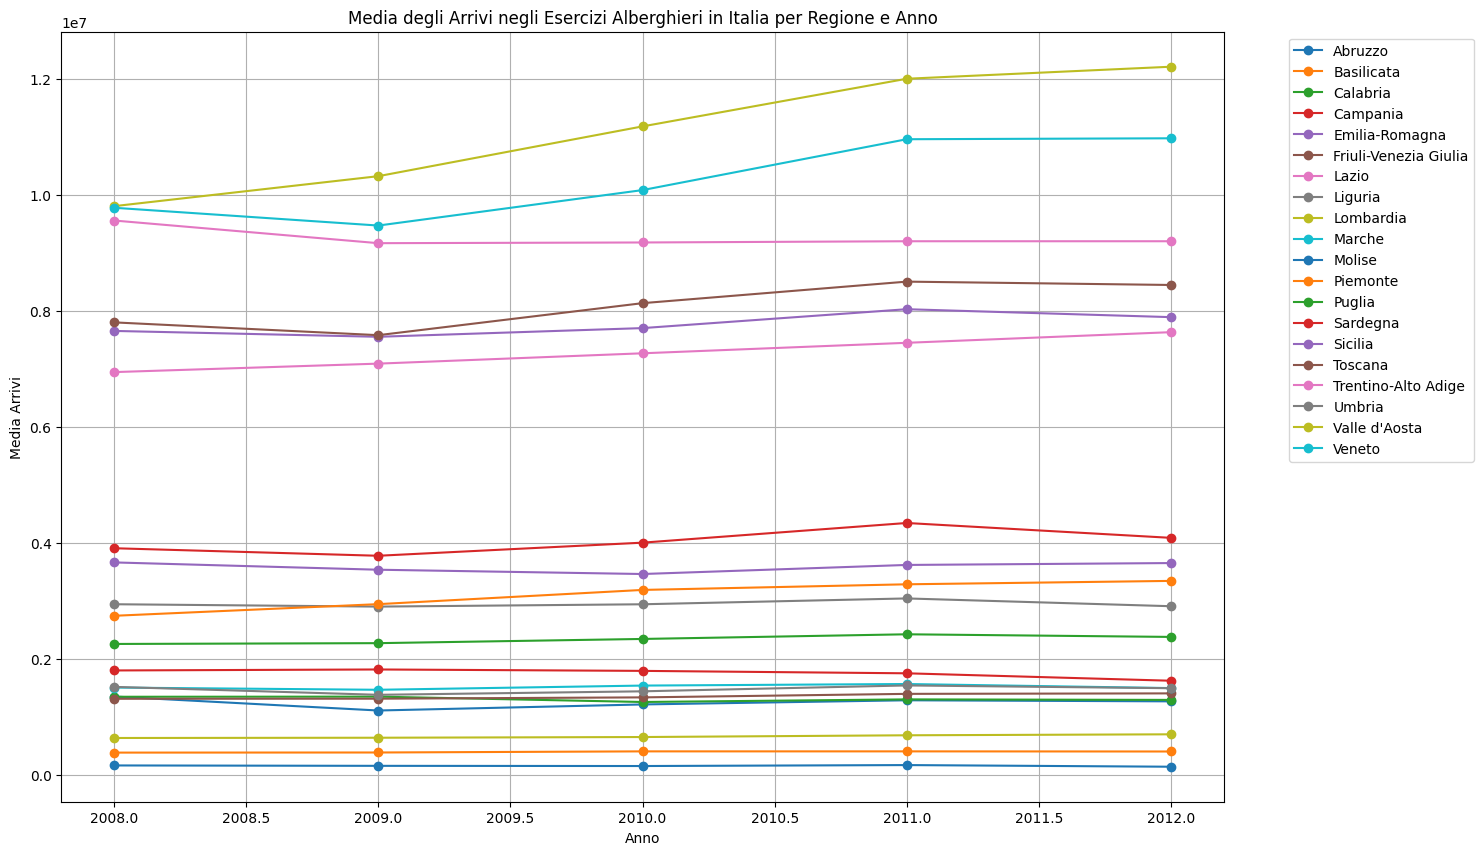

In [ ]:
def calcola_media_arrivi_per_regione_e_anno(df_arrivi_alb):

    media_arrivi_per_regione_anno = df_arrivi_alb.groupby(['Regione', 'Anno'])['Arrivi'].mean().reset_index()

    return media_arrivi_per_regione_anno


def plot_media_arrivi_per_regione_e_anno(media_arrivi_per_regione_anno):
#Crea un grafico a linee che mostra la media degli arrivi negli esercizi alberghieri in Italia per regione e anno.

# Imposta la dimensione della figura del grafico
    plt.figure(figsize=(15, 10))

#itera su ogni regione e filtra
    for regione in media_arrivi_per_regione_anno['Regione'].unique():
        regione_df = media_arrivi_per_regione_anno[media_arrivi_per_regione_anno['Regione'] == regione]
         # Traccia una linea per ogni regione, con gli anni sull'asse x e la media degli arrivi sull'asse y
        plt.plot(regione_df['Anno'], regione_df['Arrivi'], marker='o', label=regione)

    plt.xlabel('Anno')
    plt.ylabel('Media Arrivi')
    plt.title('Media degli Arrivi negli Esercizi Alberghieri in Italia per Regione e Anno')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  #aggiunge la griglia per facilitare
    plt.grid(True)
    plt.show()

calcola_media_arrivi_per_regione_e_anno(df_arrivi_alb)
plot_media_arrivi_per_regione_e_anno(media_arrivi_per_regione_anno)


Nel 2008, la regione con il maggior numero di arrivi è: Lombardia
Nel 2009, la regione con il maggior numero di arrivi è: Lombardia
Nel 2010, la regione con il maggior numero di arrivi è: Lombardia
Nel 2011, la regione con il maggior numero di arrivi è: Lombardia
Nel 2012, la regione con il maggior numero di arrivi è: Lombardia


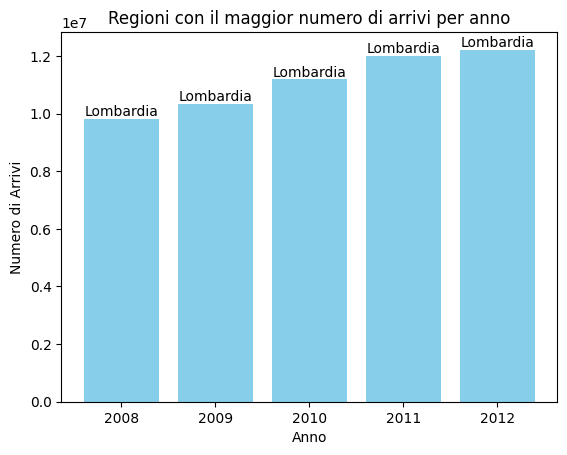

In [ ]:


def regione_con_piu_arrivi_per_anno(df_arrivi_alb):
    anni = df_arrivi_alb['Anno'].unique()
    anni_lista = []
    arrivi_max_lista = []

    for anno in anni:
        subset = df_arrivi_alb[df_arrivi_alb['Anno'] == anno]
        regione_max_arrivi = subset.loc[subset['Arrivi'].idxmax()]['Regione']
        print(f"Nel {anno}, la regione con il maggior numero di arrivi è: {regione_max_arrivi}")

        anni_lista.append(anno)
        arrivi_max_lista.append(subset['Arrivi'].max())

    plt.bar(anni_lista, arrivi_max_lista, color='skyblue')

    for anno, arrivi_max, regione in zip(anni_lista, arrivi_max_lista, df_arrivi_alb.loc[df_arrivi_alb.groupby('Anno')['Arrivi'].idxmax()]['Regione']):
        plt.text(anno, arrivi_max, regione, ha='center', va='bottom')

    plt.xlabel('Anno')
    plt.ylabel('Numero di Arrivi')
    plt.title('Regioni con il maggior numero di arrivi per anno')
    plt.show()

regione_con_piu_arrivi_per_anno(df_arrivi_alb)


Nel 2008, la regione con il maggior numero di presenze è: Trentino-Alto Adige
Nel 2009, la regione con il maggior numero di presenze è: Trentino-Alto Adige
Nel 2010, la regione con il maggior numero di presenze è: Trentino-Alto Adige
Nel 2011, la regione con il maggior numero di presenze è: Trentino-Alto Adige
Nel 2012, la regione con il maggior numero di presenze è: Trentino-Alto Adige


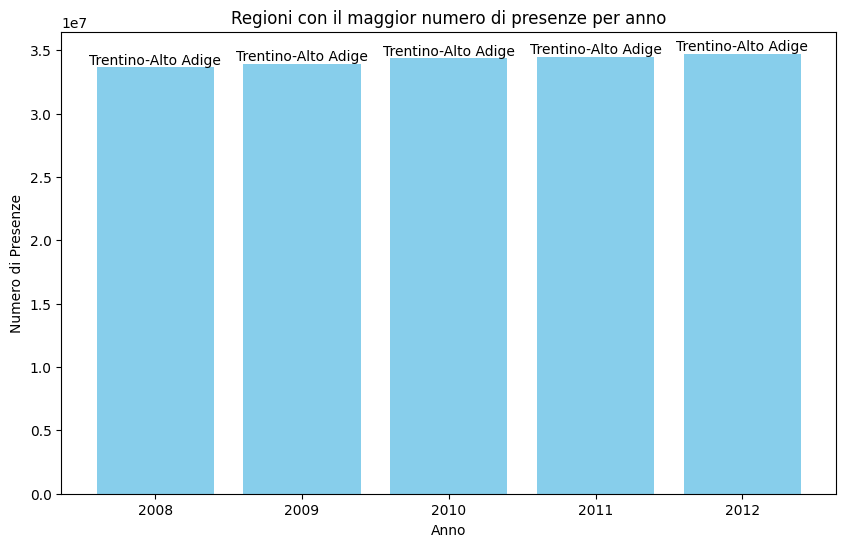

In [ ]:
def regione_con_piu_presenze_per_anno(df_presenze_alb):
    anni = df_presenze_alb['Anno'].unique()
    anni_lista = []
    presenze_max_lista = []

    for anno in anni:
        subset = df_presenze_alb[df_presenze_alb['Anno'] == anno]
        regione_max_presenze = subset.loc[subset['Presenze'].idxmax()]['Regione']
        print(f"Nel {anno}, la regione con il maggior numero di presenze è: {regione_max_presenze}")

        anni_lista.append(anno)
        presenze_max_lista.append(subset['Presenze'].max())
    plt.figure(figsize=(10, 6))
    plt.bar(anni_lista, presenze_max_lista, color='skyblue')

    for anno, presenze_max, regione in zip(anni_lista, presenze_max_lista, df_presenze_alb.loc[df_presenze_alb.groupby('Anno')['Presenze'].idxmax()]['Regione']):
        plt.text(anno, presenze_max, regione, ha='center', va='bottom')

    plt.xlabel('Anno')
    plt.ylabel('Numero di Presenze')
    plt.title('Regioni con il maggior numero di presenze per anno')
    plt.show()

regione_con_piu_presenze_per_anno(df_presenze_alb)
